In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("D:\Bitcoin.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2678,2022-01-16,43172.039063,43436.808594,42691.023438,43113.878906,43113.878906,17902097845
2679,2022-01-17,43118.121094,43179.390625,41680.320313,42250.550781,42250.550781,21690904261
2680,2022-01-18,42250.074219,42534.402344,41392.214844,42375.632813,42375.632813,22417209227
2681,2022-01-19,42374.039063,42478.304688,41242.914063,41744.328125,41744.328125,23091543258


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.shape

(2683, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,10989.900302,11286.625175,10662.957284,11003.581793,11003.581793,1.459304e+10
std,15902.616531,16331.949304,15408.069197,15908.160803,15908.160803,2.008458e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,601.778015,606.707001,596.048005,602.733490,602.733490,7.839140e+07
50%,6235.029785,6371.549805,6093.669922,6238.049805,6238.049805,4.999240e+09
75%,10316.638183,10495.605957,10067.539062,10317.936035,10317.936035,2.445092e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [7]:
df.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2678  2022-01-16  43172.039063  43436.808594  42691.023438  43113.878906   
2679  2022-01-17  43118.121094  43179.390625  41680.320313  42250.550781   
2680  2022-01-18  42250.074219  42534.402344  41392.214844  42375.632813   
2681  2022-01-19  42374.039063  42478.304688  41242.914063  41744.328125   
2682  2022-01-20  41736.527344  42034.734375  41724.464844  41933.546875   

         Adj Close       Volume  
0       457.334015   

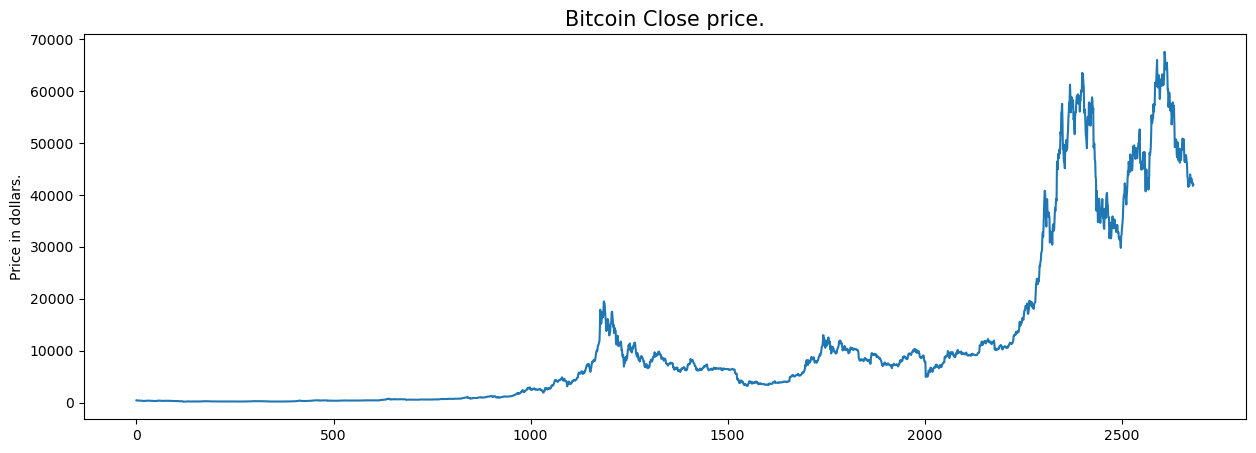

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [10]:
df[df['Close'] == df['Adj Close']].shape, df.shape


((2683, 7), (2683, 7))

In [11]:
df = df.drop(['Adj Close'], axis=1)

In [12]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

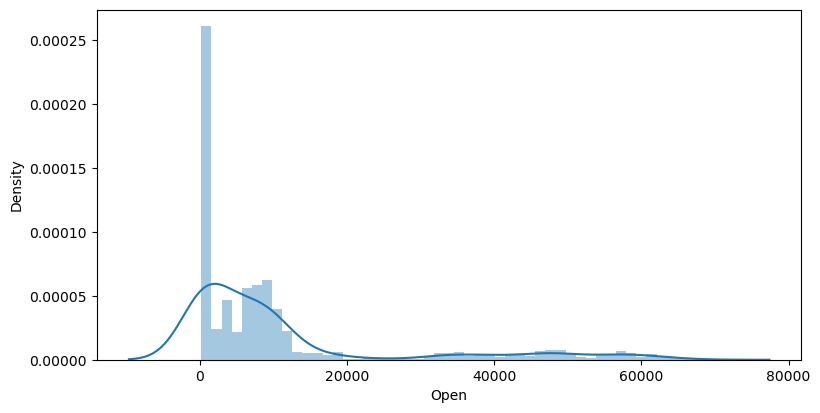

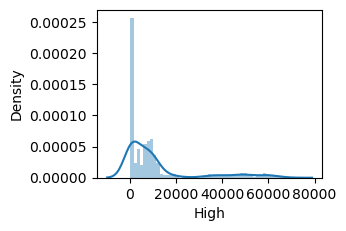

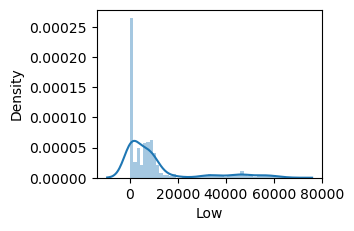

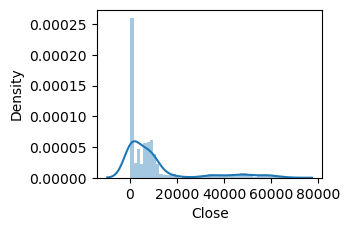

In [14]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(df[col])
    plt.show()


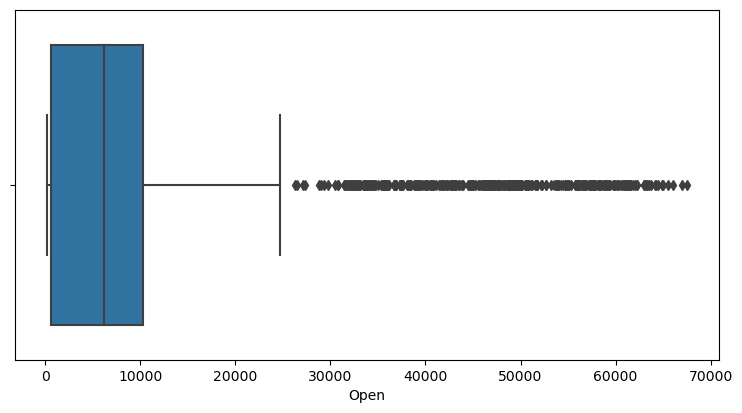

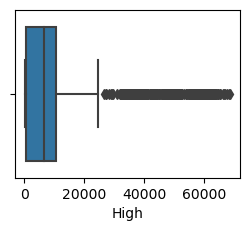

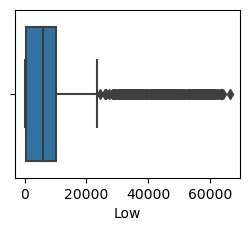

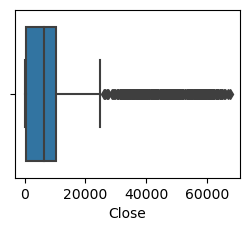

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(df[col])
    plt.show()


In [16]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


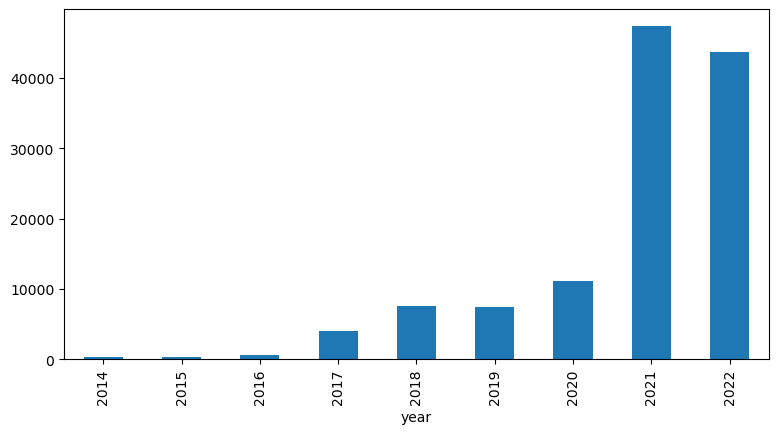

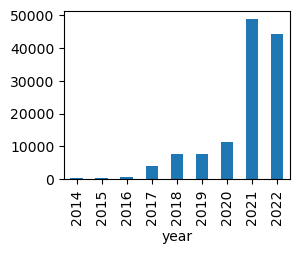

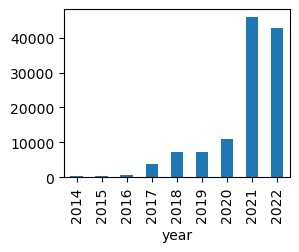

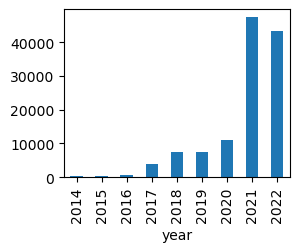

In [17]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()


In [18]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [19]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


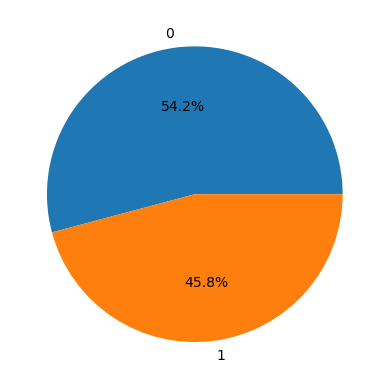

In [20]:
plt.pie(df['target'].value_counts().values, 
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

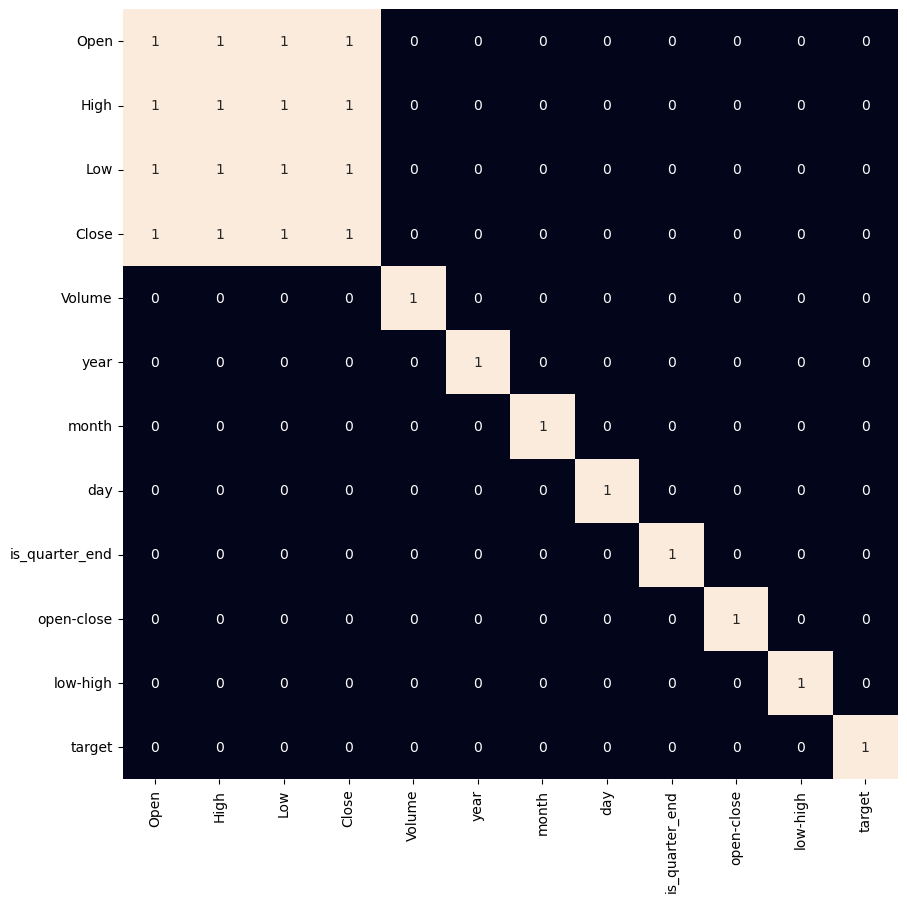

In [21]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2414, 3) (269, 3)


In [24]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5251799951412355
Validation Accuracy :  0.5395814376706096

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47457982729300563
Validation Accuracy :  0.5041515013648772

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

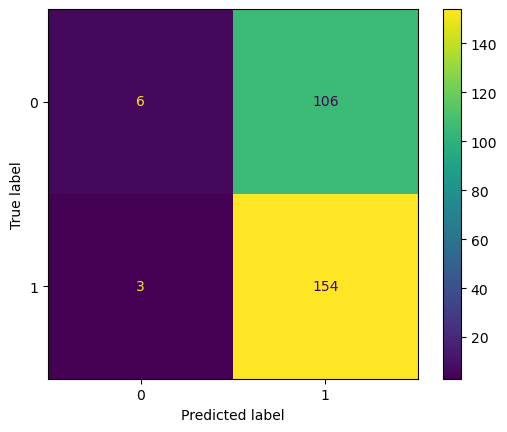

In [25]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

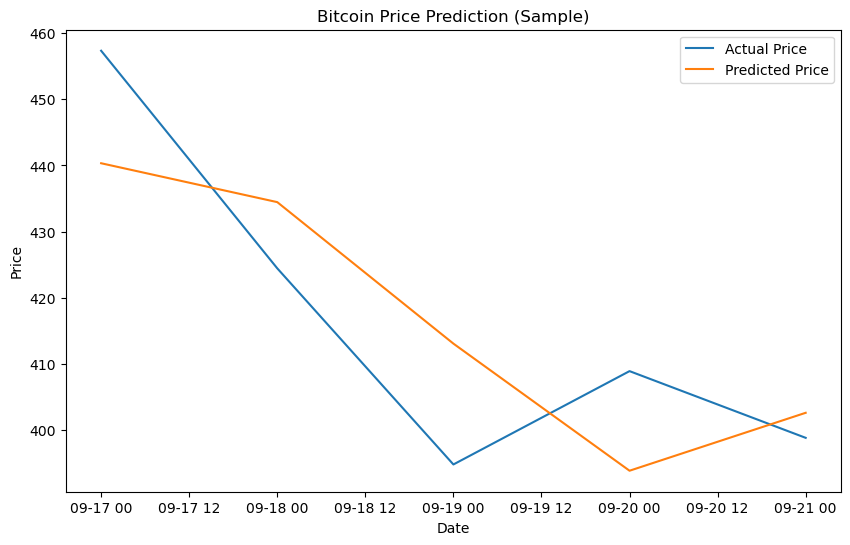

In [30]:
data = pd.DataFrame({
    'Date': pd.to_datetime(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21']),
    'Open': [465.864014, 456.859985, 424.102997, 394.673004, 408.084991],
    'High': [468.174011, 456.859985, 427.834991, 423.295990, 412.425995],
    'Low': [452.421997, 413.104004, 384.532013, 389.882996, 393.181000],
    'Close': [457.334015, 424.440002, 394.795990, 408.903992, 398.821014],
    'Adj Close': [457.334015, 424.440002, 394.795990, 408.903992, 398.821014],
    'Volume': [21056800, 34483200, 37919700, 36863600, 26580100]
})

# Pick the data you want to use for prediction (e.g. Close price)
y = data['Close']

# Choose the features you want to use for prediction (e.g. Open price)
X = data[['Open']]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Price')
plt.plot(data['Date'], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction (Sample)')
plt.legend()
plt.show()